<a href="https://colab.research.google.com/github/ELiTE0005/NNML-algorithms/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Figure size 600x500 with 0 Axes>

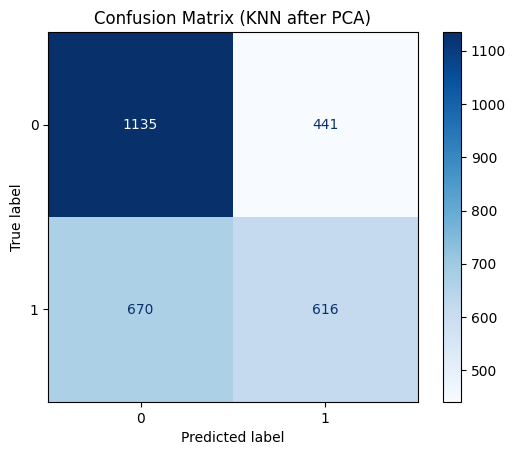

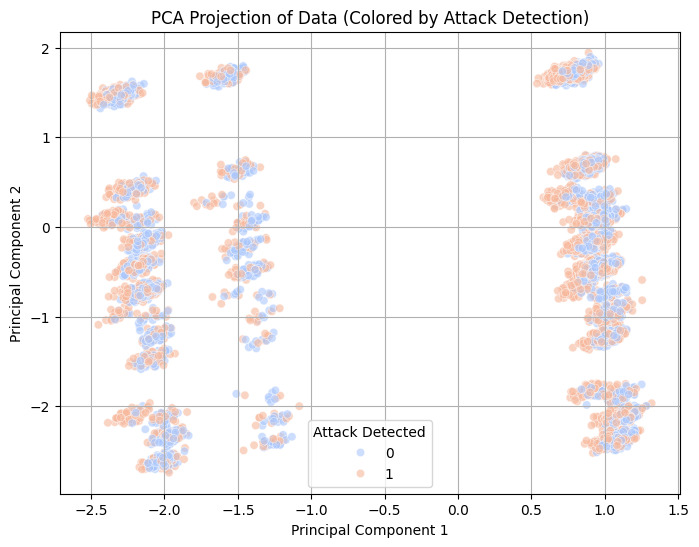

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import seaborn as sns

# Load the dataset
df = pd.read_excel("/content/cybersecurity_intrusion_data.xlsx", sheet_name="cybersecurity_intrusion_data")

# Drop session_id and encode categorical columns
df = df.drop(columns=["session_id"])
df = pd.get_dummies(df, columns=["protocol_type", "encryption_used", "browser_type"])

# Split into features and target
X = df.drop(columns=["attack_detected"])
y = df["attack_detected"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)

plt.figure(figsize=(6, 5))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (KNN after PCA)")
plt.show()

# Plot PCA 2D scatter with predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', alpha=0.6)
plt.title("PCA Projection of Data (Colored by Attack Detection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Attack Detected", loc="best")
plt.grid(True)
plt.show()
